# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
bcanc_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
bcanc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [11]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
bcanc_df.shape

(699, 11)

In [4]:
bcanc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
barnuc = bcanc_df['Bare Nuclei']

In [7]:
barnuc.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [9]:
## Bare Nuclei column has ? in data. it is required to be updated.

In [10]:
bcanc_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [1]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [11]:
bcanc_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
bcanc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [2]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [13]:
bcanc_df[bcanc_df['Bare Nuclei']=="?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [14]:
bcanc_df[bcanc_df['Bare Nuclei']=="?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [3]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
bcanc_df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [18]:
bcanc_df['Bare Nuclei'].replace("?",'1', inplace=True)
bcanc_df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [19]:
bcanc_df['Bare Nuclei'] = bcanc_df['Bare Nuclei'].astype('int64')

In [21]:
duplc = bcanc_df.duplicated()
print('Number of duplicate rows = %d' % (duplc.sum()))

bcanc_df[duplc]

Number of duplicate rows = 9


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [22]:
print('Number of rows before discarding duplicates = %d' % (bcanc_df.shape[0]))
bcanc_df.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (bcanc_df.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 690


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [4]:
# Check for correlation of variable

In [24]:
bcanc_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [27]:
bcanc_df.corr(method='spearman')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.010339,-0.042211,-0.058608,-0.050745,-0.087372,-0.117468,-0.097536,-0.073741,-0.076743,-0.103627
ClumpThickness,-0.010339,1.000000,0.665446,0.663656,0.543298,0.580163,0.585841,0.539370,0.568344,0.418458,0.683464
Cell Size,-0.042211,0.665446,1.000000,0.890545,0.745768,0.785208,0.758111,0.721362,0.756816,0.507965,0.854293
Cell Shape,-0.058608,0.663656,0.890545,1.000000,0.714559,0.756558,0.737466,0.693977,0.725353,0.471842,0.834722
Marginal Adhesion,-0.050745,0.543298,0.745768,0.714559,1.000000,0.671344,0.695115,0.626590,0.635081,0.446248,0.730323
Single Epithelial Cell Size,-0.087372,0.580163,0.785208,0.756558,0.671344,1.000000,0.686217,0.642019,0.706230,0.480154,0.761197
Bare Nuclei,-0.117468,0.585841,0.758111,0.737466,0.695115,0.686217,1.000000,0.668754,0.649732,0.477407,0.828680
Normal Nucleoli,-0.097536,0.539370,0.721362,0.693977,0.626590,0.642019,0.668754,1.000000,0.665556,0.386328,0.740936
Bland Chromatin,-0.073741,0.568344,0.756816,0.725353,0.635081,0.706230,0.649732,0.665556,1.000000,0.502949,0.744694
Mitoses,-0.076743,0.418458,0.507965,0.471842,0.446248,0.480154,0.477407,0.386328,0.502949,1.000000,0.527199


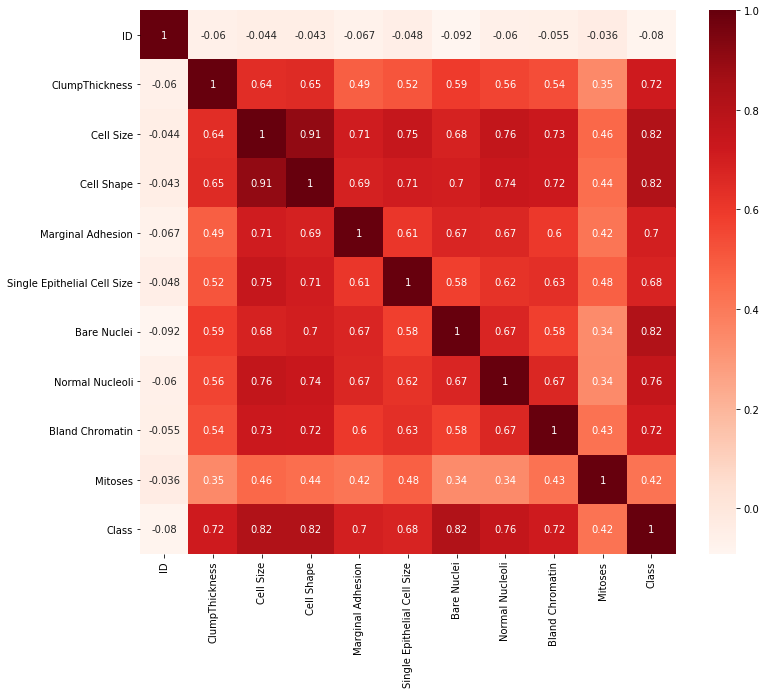

In [28]:
plt.figure(figsize=(12,10))
cor = bcanc_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables4
#Let us check for pair plots

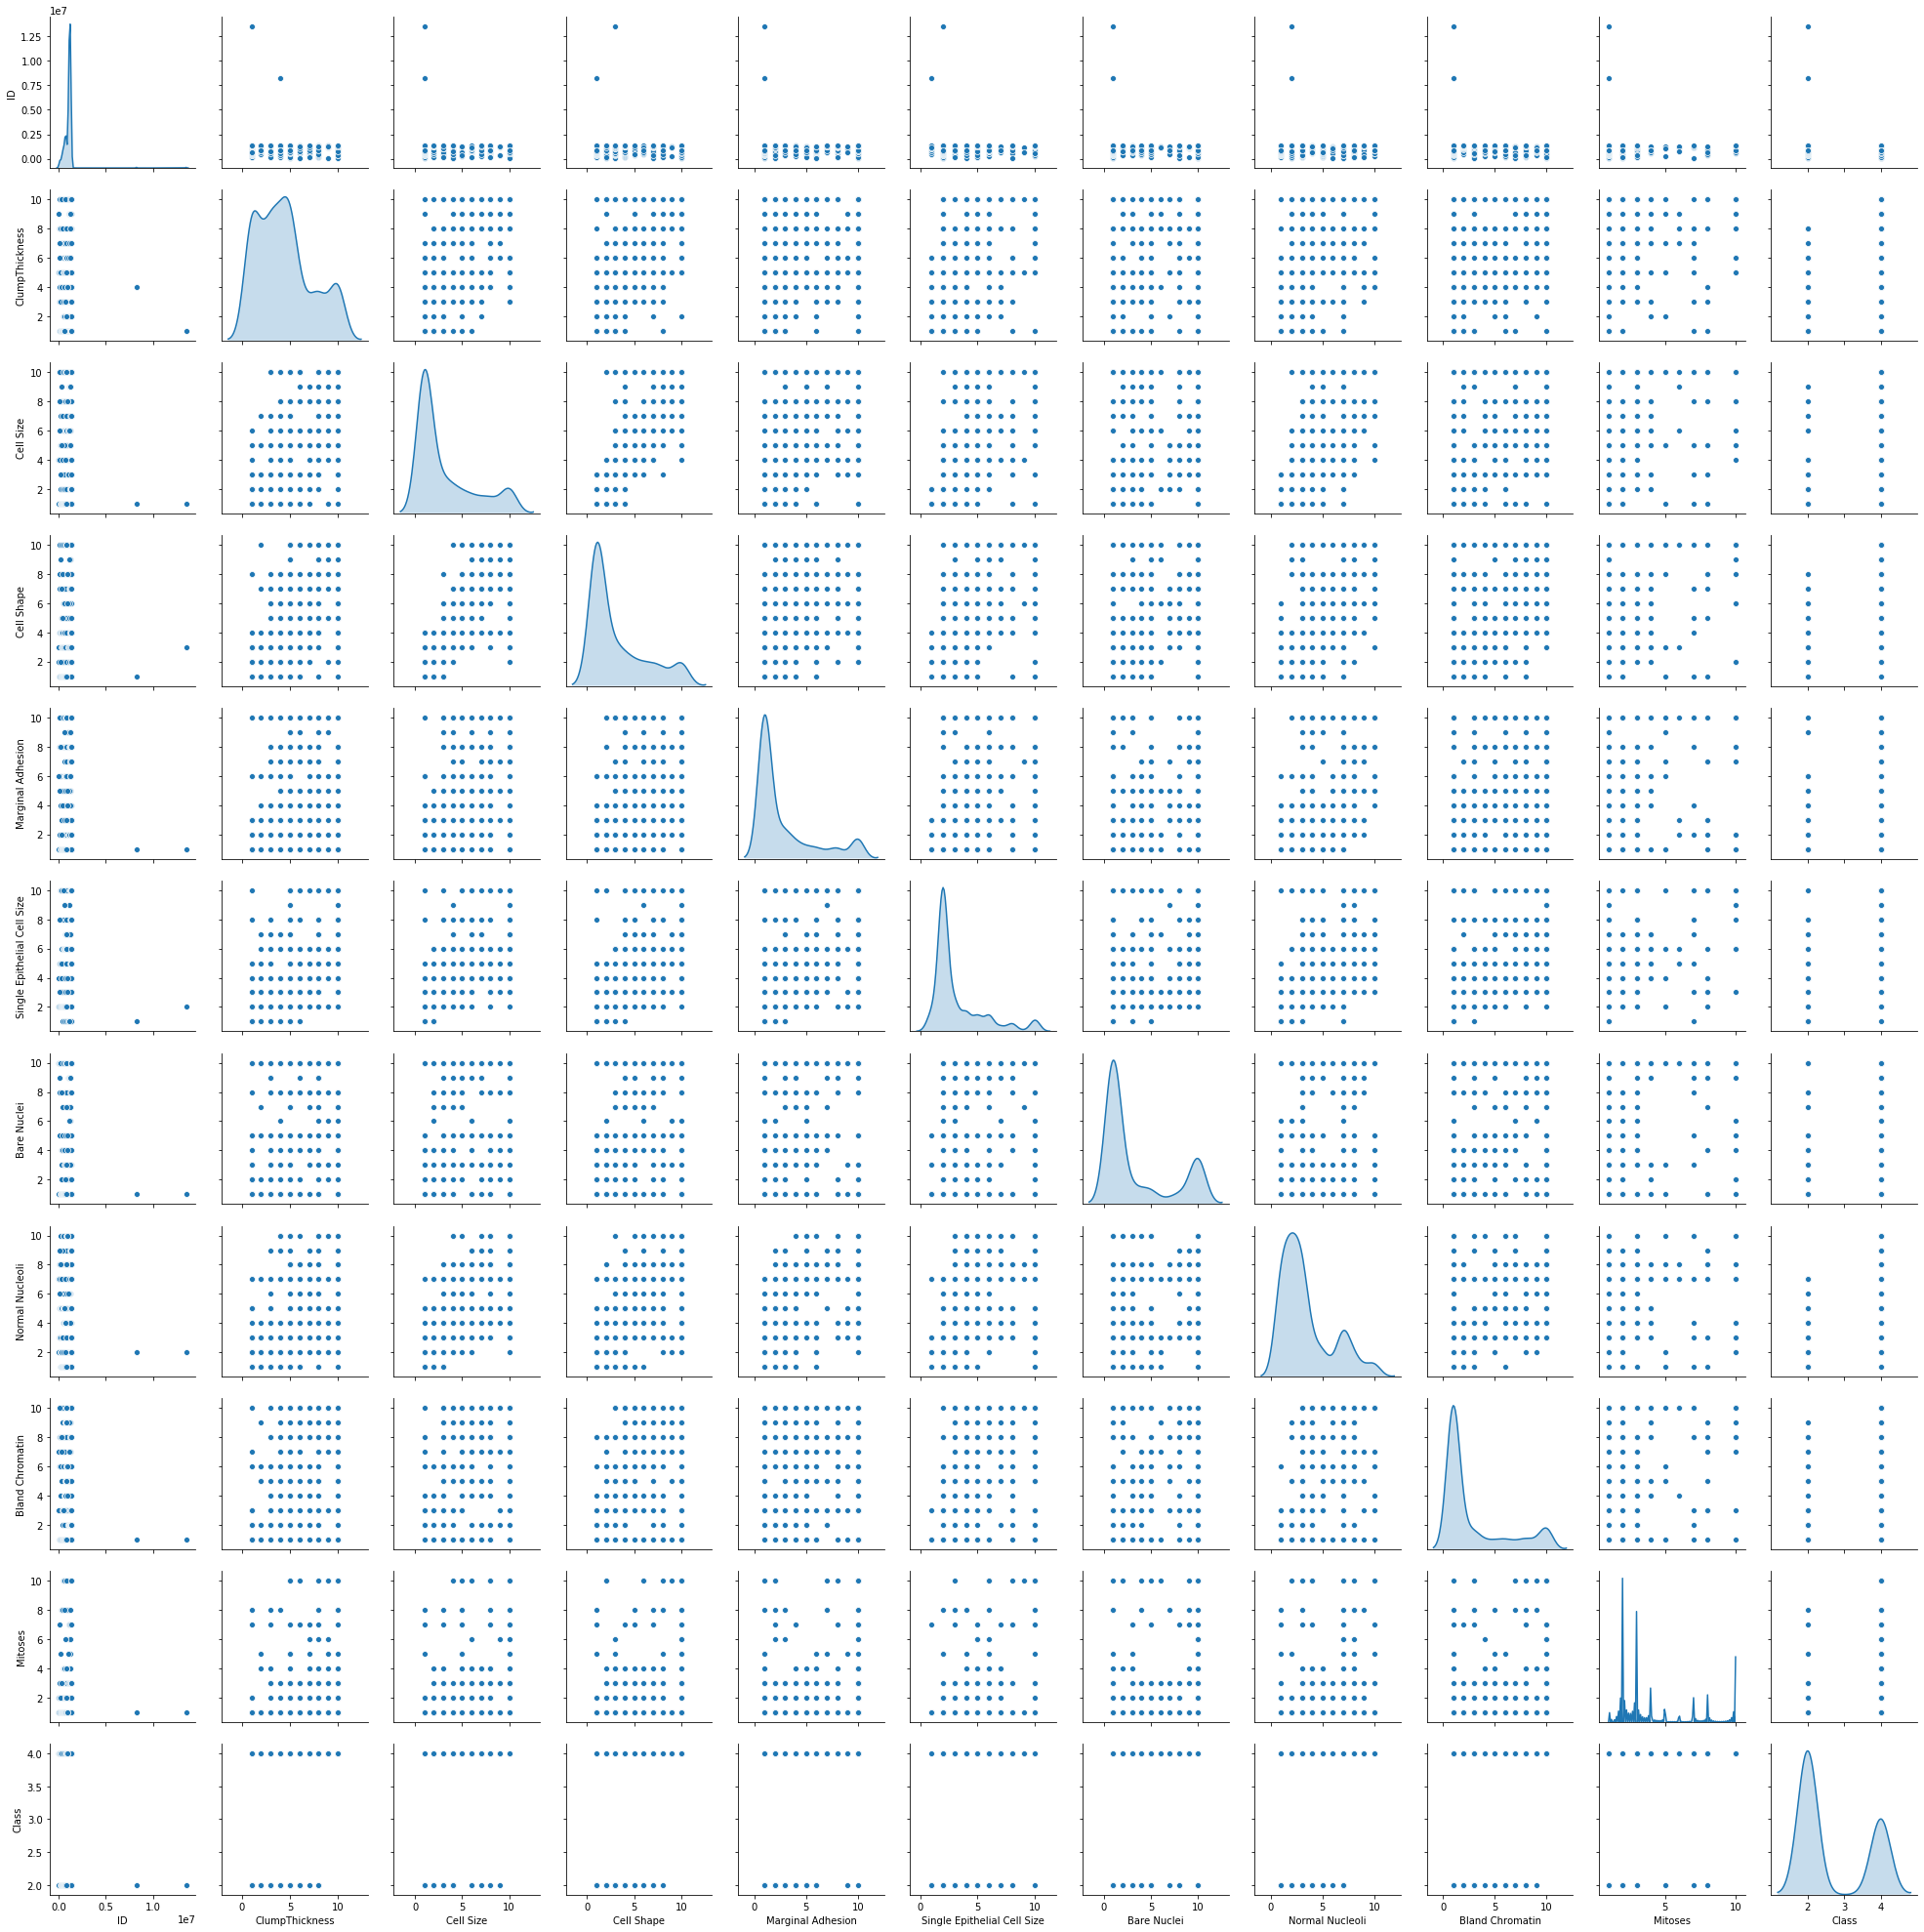

In [29]:
sns.pairplot(bcanc_df,diag_kind='kde')

In [30]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

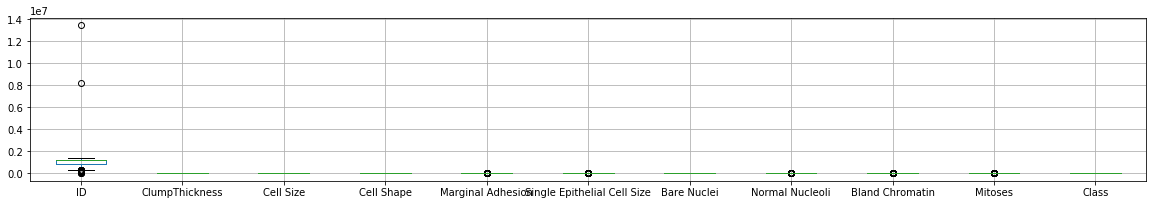

In [31]:
bcanc_df.boxplot(figsize=(20,3))

In [33]:
pd.crosstab(bcanc_df['Marginal Adhesion'], bcanc_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [34]:
bcanc_df['Marginal Adhesion'] = np.where(bcanc_df['Marginal Adhesion'] >4, 4, bcanc_df['Marginal Adhesion'])
bcanc_df['Marginal Adhesion'].value_counts()


1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [38]:
pd.crosstab(bcanc_df['Single Epithelial Cell Size'], bcanc_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,49,214


In [ ]:
#Single Epithelial Cell Size values to be compared till the rank of 3

In [36]:
bcanc_df['Single Epithelial Cell Size'] = np.where(bcanc_df['Single Epithelial Cell Size'] >3, 3, bcanc_df['Single Epithelial Cell Size'])

In [39]:
pd.crosstab(bcanc_df['Normal Nucleoli'], bcanc_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [40]:
#Normal Nucleoli values are to be considered till valkue of 3

In [41]:
bcanc_df['Normal Nucleoli'] = np.where(bcanc_df['Normal Nucleoli'] >4, 4, bcanc_df['Normal Nucleoli'])

In [42]:
pd.crosstab(bcanc_df['Bland Chromatin'], bcanc_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [43]:
bcanc_df['Bland Chromatin'] = np.where(bcanc_df['Bland Chromatin'] >4, 4, bcanc_df['Bland Chromatin'])

In [44]:
pd.crosstab(bcanc_df['Mitoses'], bcanc_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [45]:
bcanc_df['Mitoses'] = np.where(bcanc_df['Mitoses'] >3, 3, bcanc_df['Mitoses'])


In [46]:
bcan_new = bcanc_df.drop(['ID','Class'], axis =1)

bcan_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,3,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1


In [47]:
from scipy.stats import zscore
bcan_new=bcan_new.apply(zscore)
bcan_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.536685,-0.686858,0.322808,-0.718310,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.161998,1.803153,0.322808,0.046557,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.536685,-0.410190,0.322808,-0.718310,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,1.161998,0.143146,0.322808,1.576291,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.536685,-0.686858,0.322808,-0.718310,-0.438024


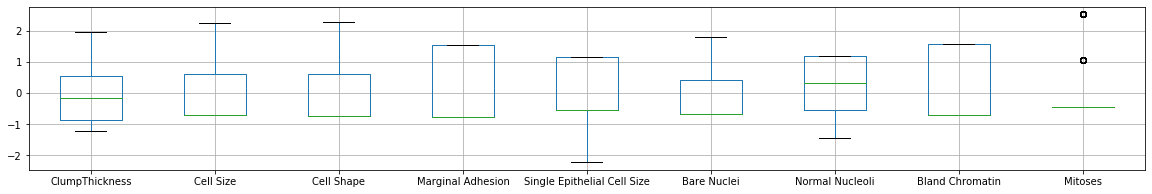

In [48]:
bcan_new.boxplot(figsize=(20,3))

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [49]:

cov_matrix = np.cov(bcan_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.56876059 0.59150555
  0.54669109 0.57214901 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.69491481 0.68556472
  0.66940328 0.72684553 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.68116899 0.70518656
  0.65890363 0.71910723 0.48167882]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.63617971 0.69693138
  0.60427482 0.65326018 0.42473633]
 [0.56876059 0.69491481 0.68116899 0.63617971 1.00145138 0.6348984
  0.57938679 0.66617045 0.42529666]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.6348984  1.00145138
  0.64237847 0.64168219 0.45258904]
 [0.54669109 0.66940328 0.65890363 0.60427482 0.57938679 0.64237847
  1.00145138 0.65441737 0.37940435]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.66617045 0.64168219
  0.65441737 1.00145138 0.49312095]
 [0.42745595 0.51098944 0.48167882 0.42473633 0.42529666 0.45258904
  0.37940435 0.49312095 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [50]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.3114354   0.01568016  0.02047029  0.90541669  0.07476755 -0.20399848
   0.10539206 -0.14051697 -0.06712406]
 [ 0.37194432 -0.03811526  0.7164469   0.01327345  0.0124912   0.21915718
  -0.16821058  0.49169294  0.16878882]
 [ 0.36954798 -0.07658035 -0.68846816  0.06493104 -0.12536091  0.25767414
  -0.16140193  0.50385521  0.13165607]
 [ 0.33901535 -0.15284936 -0.05474049 -0.2499106   0.50978592 -0.44868011
  -0.25095696  0.09542832 -0.5128083 ]
 [ 0.33213311 -0.10331615 -0.02823789 -0.07803192  0.19514245  0.30069671
  -0.47696574 -0.63409222  0.33772571]
 [ 0.3414089  -0.10333249  0.07794801 -0.10158408 -0.58656918  0.2695813
   0.09087582 -0.24162259 -0.61072888]
 [ 0.32338417 -0.24134232 -0.03010916 -0.18734513  0.33818548  0.18091422
   0.78876393 -0.08730706  0.15588898]
 [ 0.34571185  0.00531696  0.00642328 -0.21995643 -0.45632921 -0.66445249
   0.06545056 -0.07679928  0.41487057]
 [ 0.24940299  0.94310533 -0.03845512 -0.11612816  0.11792794  0.07297459
   0.

# Q8 Find variance and cumulative variance by each eigen vector

In [51]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.01269211  73.6623436   79.01893031  83.78090726  88.23370958
  92.45369715  95.84290092  98.98385202 100.        ]


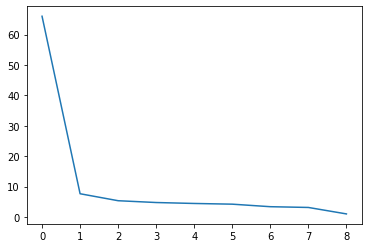

In [53]:
plt.plot(var_exp)

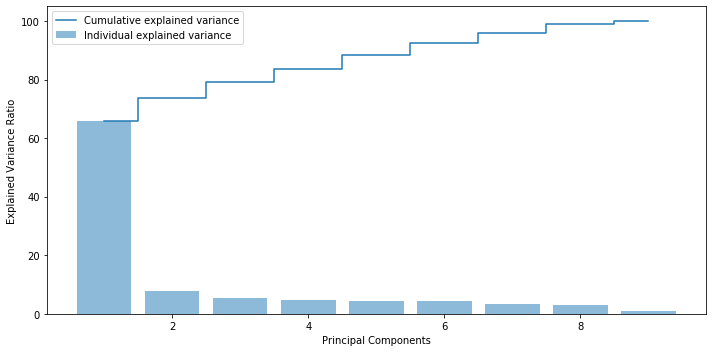

In [54]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(bcan_new)
data_reduced.transpose()

array([[-1.4041299 ,  1.80009293, -1.53091511, ...,  3.54596616,
         2.67544579,  3.01970712],
       [-0.16192711, -1.05929394, -0.20165499, ...,  0.22790085,
        -1.19958527, -1.2799403 ],
       [-0.5813698 ,  0.47119879,  0.08993856, ...,  0.59831147,
         1.06422556,  1.04843898],
       ...,
       [ 0.18622185, -1.32900516,  0.06493736, ...,  1.53630976,
         0.79160414,  0.71163103],
       [ 0.27307077,  0.79388265,  0.24009745, ..., -1.33986905,
        -0.45028227, -0.72402557],
       [ 0.12081955,  0.23487236,  0.3403235 , ...,  0.26509061,
        -0.53481417, -0.28604892]])

# Q10 Find correlation between components and features

In [58]:
df_comp = pd.DataFrame(pca.components_,columns=list(bcan_new))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.311435,0.371944,0.369548,0.339015,0.332133,0.341409,0.323384,0.345712,0.249403
1,0.015680,-0.038115,-0.076580,-0.152849,-0.103316,-0.103332,-0.241342,0.005317,0.943105
2,-0.905417,-0.013273,-0.064931,0.249911,0.078032,0.101584,0.187345,0.219956,0.116128
3,0.105392,-0.168211,-0.161402,-0.250957,-0.476966,0.090876,0.788764,0.065451,0.096854
4,-0.067124,0.168789,0.131656,-0.512808,0.337726,-0.610729,0.155889,0.414871,-0.056847


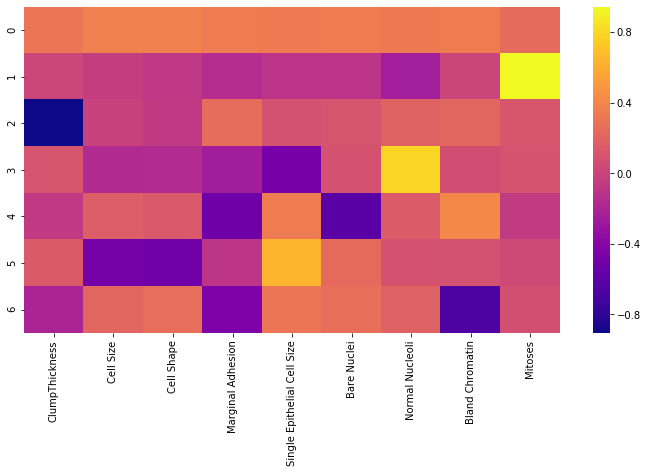

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [60]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [62]:
jokes_df.shape

(24983, 101)

In [65]:
jokes_df.dtypes

NumJokes      int64
Joke1       float64
Joke2       float64
Joke3       float64
Joke4       float64
Joke5       float64
Joke6       float64
Joke7       float64
Joke8       float64
Joke9       float64
Joke10      float64
Joke11      float64
Joke12      float64
Joke13      float64
Joke14      float64
Joke15      float64
Joke16      float64
Joke17      float64
Joke18      float64
Joke19      float64
Joke20      float64
Joke21      float64
Joke22      float64
Joke23      float64
Joke24      float64
Joke25      float64
Joke26      float64
Joke27      float64
Joke28      float64
Joke29      float64
             ...   
Joke71      float64
Joke72      float64
Joke73      float64
Joke74      float64
Joke75      float64
Joke76      float64
Joke77      float64
Joke78      float64
Joke79      float64
Joke80      float64
Joke81      float64
Joke82      float64
Joke83      float64
Joke84      float64
Joke85      float64
Joke86      float64
Joke87      float64
Joke88      float64
Joke89      float64


In [66]:
jokes_df.describe()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,...,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,...,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,...,4.760000,3.59000,4.610000,3.250000,3.160000,3.300000,3.590000,2.670000,1.335000,3.930000
50%,72.000000,5.050000,3.690000,4.660000,3.450000,1.120000,3.540000,-0.050000,-0.290000,4.030000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,100.000000,99.000000,99.000000,99.000000,99.000000,4.470000,8.010000,3.930000,3.060000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [67]:
jokes_df.corr()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
NumJokes,1.000000,-0.803227,-0.740597,-0.811430,-0.829166,0.014158,-0.648902,0.029465,0.063082,-0.826933,...,-0.769747,-0.766322,-0.770323,-0.763352,-0.765270,-0.768899,-0.767771,-0.772317,-0.766723,-0.844410
Joke1,-0.803227,1.000000,0.839431,0.898740,0.875018,0.044361,0.614369,0.031481,-0.008295,0.871608,...,0.461829,0.462037,0.471786,0.469815,0.473835,0.483118,0.489544,0.504848,0.509439,0.575021
Joke2,-0.740597,0.839431,1.000000,0.839629,0.768362,0.041993,0.672186,0.022251,-0.020643,0.758905,...,0.388709,0.390863,0.396504,0.393005,0.402222,0.408493,0.411110,0.427326,0.430501,0.485843
Joke3,-0.811430,0.898740,0.839629,1.000000,0.893659,0.016285,0.650767,-0.019595,-0.046365,0.870788,...,0.453804,0.455849,0.463698,0.464513,0.468022,0.475374,0.484317,0.495187,0.500897,0.568004
Joke4,-0.829166,0.875018,0.768362,0.893659,1.000000,0.000049,0.603753,-0.029663,-0.063595,0.926676,...,0.500036,0.499204,0.508043,0.508083,0.510857,0.522147,0.530067,0.543763,0.550994,0.623195
Joke5,0.014158,0.044361,0.041993,0.016285,0.000049,1.000000,0.004973,0.182785,0.154957,0.009620,...,-0.022267,-0.020191,-0.022717,-0.026397,-0.019071,-0.024138,-0.019316,-0.016274,-0.017785,-0.018034
Joke6,-0.648902,0.614369,0.672186,0.650767,0.603753,0.004973,1.000000,-0.021610,-0.046181,0.608155,...,0.300982,0.299913,0.311914,0.305508,0.310715,0.315479,0.317296,0.328013,0.333288,0.377791
Joke7,0.029465,0.031481,0.022251,-0.019595,-0.029663,0.182785,-0.021610,1.000000,0.202525,-0.010378,...,-0.025285,-0.030201,-0.026341,-0.030399,-0.019192,-0.030618,-0.027680,-0.021092,-0.027005,-0.030079
Joke8,0.063082,-0.008295,-0.020643,-0.046365,-0.063595,0.154957,-0.046181,0.202525,1.000000,-0.040766,...,-0.048558,-0.051441,-0.054945,-0.045587,-0.045962,-0.054884,-0.048222,-0.049887,-0.050271,-0.054310
Joke9,-0.826933,0.871608,0.758905,0.870788,0.926676,0.009620,0.608155,-0.010378,-0.040766,1.000000,...,0.489762,0.493359,0.501072,0.502022,0.506028,0.517181,0.523471,0.536479,0.542923,0.614180


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [68]:
##ratings data frame not availble in data provided for lab

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.